In [97]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

1) Loading the dataset and performing all the preprocessing required.

In [98]:
from keras.datasets import cifar10

In [99]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [100]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [101]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [102]:
x_train.dtype

dtype('float64')

In [103]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [104]:
y_train.dtype

dtype('uint8')

In [105]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [106]:
num_classes=len(np.unique(y_train))

In [107]:
num_classes

10

In [108]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [109]:
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

Dividing into validation and training dataset

In [110]:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

In [111]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [112]:
print(y_valid.shape)
print(x_valid.shape)

(5000, 10)
(5000, 32, 32, 3)


2) Building a CNN architecture with keres and stack an ANN on the top of CNN.

In [113]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [114]:
model=Sequential()

In [115]:
model.add(Conv2D(16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [116]:
model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [117]:
model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

In [119]:
model.add(Flatten())

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

Stacking an ANN on top of CNN

In [121]:
model.add(Dense(512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(256,activation='relu',kernel_initializer='uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='uniform'))

In [122]:
model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
model.add(Dense(32,activation='relu',kernel_initializer='uniform'))
model.add(Dense(16,activation='relu',kernel_initializer='uniform'))

In [123]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [124]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [125]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

Fit the model

In [126]:
results=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 13s - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3016 - val_accuracy: 0.1114 - 13s/epoch - 140ms/step
Epoch 2/10
90/90 - 12s - loss: 2.0938 - accuracy: 0.1803 - val_loss: 1.9625 - val_accuracy: 0.2074 - 12s/epoch - 137ms/step
Epoch 3/10
90/90 - 11s - loss: 1.9350 - accuracy: 0.2078 - val_loss: 1.9082 - val_accuracy: 0.2184 - 11s/epoch - 119ms/step
Epoch 4/10
90/90 - 12s - loss: 1.9042 - accuracy: 0.2241 - val_loss: 1.8893 - val_accuracy: 0.2368 - 12s/epoch - 134ms/step
Epoch 5/10
90/90 - 12s - loss: 1.8659 - accuracy: 0.2424 - val_loss: 1.8512 - val_accuracy: 0.2608 - 12s/epoch - 131ms/step
Epoch 6/10
90/90 - 12s - loss: 1.8263 - accuracy: 0.2682 - val_loss: 1.8625 - val_accuracy: 0.2670 - 12s/epoch - 130ms/step
Epoch 7/10
90/90 - 12s - loss: 1.8068 - accuracy: 0.2843 - val_loss: 1.7737 - val_accuracy: 0.3084 - 12s/epoch - 138ms/step
Epoch 8/10
90/90 - 12s - loss: 1.7489 - accuracy: 0.3042 - val_loss: 1.7320 - val_accuracy: 0.3274 - 12s/epoch - 128ms/step
Epoch 9/

3) Fit and evaluate the model. Plotting the training and validation curves.

In [127]:
result=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6765 - accuracy: 0.3260


In [128]:
result

[1.6764512062072754, 0.32600000500679016]

In [129]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

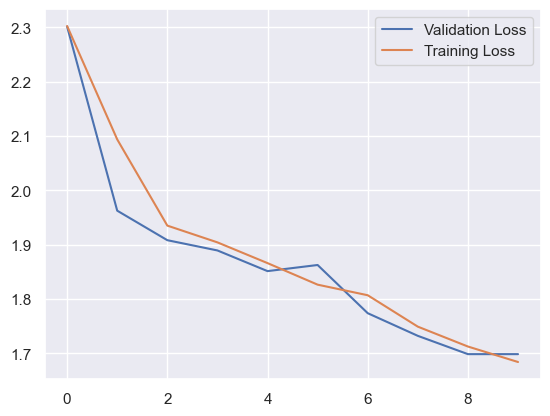

In [130]:
plt.plot(results.history['val_loss'],label='Validation Loss')
plt.plot(results.history['loss'],label='Training Loss')
plt.legend()

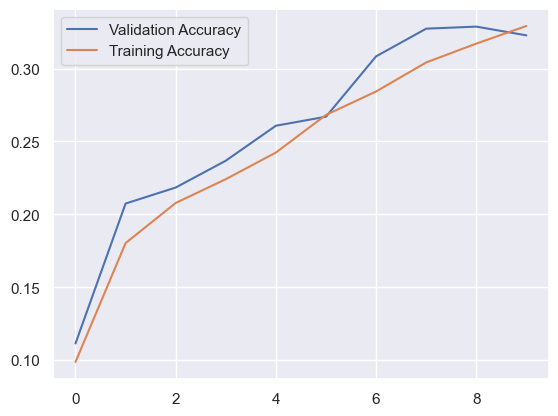

In [131]:
plt.plot(results.history['val_accuracy'],label='Validation Accuracy')
plt.plot(results.history['accuracy'],label='Training Accuracy')
plt.legend()